Tujuan : Mengklasifikasikan minuman berdasarkan skor Nutri-Score. Nutri-Score adalah sistem label nutrisi yang mengklasifikasikan minuman dari A (terbaik) ke E (terburuk) berdasarkan nilai nutrisi per 100 ml, seperti kandungan energi, lemak, gula, garam, serat, dan protein.


**Dataset**
---

Pengumpulan data berdasarkan scraping dari situs Open Food Facts



In [412]:
import pandas as pd

url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


**Data Preprocessing**
---

Cleaning Data
---

In [414]:
print("Jumlah awal data:", len(df))
print("Jumlah kolom dengan NaN:\n", df.isna().sum())

df.drop_duplicates(inplace=True)
df.replace("", pd.NA, inplace=True)

df = df[df["Nama_minuman"].notna()]
df = df[df["Nama_minuman"].str.strip() != ""]

nutrisi_cols = [
    "Energy (Per 100 ml)", "Fat (Per 100 ml)", "Saturated fat (Per 100 ml)",
    "Carbohydrates (Per 100 ml)", "Sugars (Per 100 ml)", "Fiber (Per 100 ml)",
    "Proteins (Per 100 ml)", "Salt (Per 100 ml)"
]
df[nutrisi_cols] = df[nutrisi_cols].apply(pd.to_numeric, errors='coerce')

df = df[df[nutrisi_cols].isna().mean(axis=1) < 0.5]

df.reset_index(drop=True, inplace=True)

print("Jumlah akhir data:", len(df))

Jumlah awal data: 811
Jumlah kolom dengan NaN:
 Kategori                        0
Nama_minuman                   11
Nutri_Score                     0
Energy (Per 100 ml)             0
Fat (Per 100 ml)                0
Saturated fat (Per 100 ml)     35
Carbohydrates (Per 100 ml)      1
Sugars (Per 100 ml)             8
Fiber (Per 100 ml)            301
Proteins (Per 100 ml)           0
Salt (Per 100 ml)               0
dtype: int64
Jumlah akhir data: 798


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    798 non-null    object 
 1   Nama_minuman                798 non-null    object 
 2   Nutri_Score                 798 non-null    object 
 3   Energy (Per 100 ml)         798 non-null    float64
 4   Fat (Per 100 ml)            798 non-null    float64
 5   Saturated fat (Per 100 ml)  763 non-null    float64
 6   Carbohydrates (Per 100 ml)  797 non-null    float64
 7   Sugars (Per 100 ml)         790 non-null    float64
 8   Fiber (Per 100 ml)          500 non-null    float64
 9   Proteins (Per 100 ml)       798 non-null    float64
 10  Salt (Per 100 ml)           798 non-null    float64
dtypes: float64(8), object(3)
memory usage: 68.7+ KB


In [416]:
df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


Missing Value
---

In [417]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,0,0.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),35,4.0,float64
Carbohydrates (Per 100 ml),1,0.0,float64
Sugars (Per 100 ml),8,1.0,float64
Fiber (Per 100 ml),298,37.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [418]:
df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [419]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,0,0.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [420]:
df1=df.copy()

Label Encoding
---

In [421]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Nutri_Score'] = le.fit_transform(df1['Nutri_Score'])

for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


In [422]:
df2=df1.copy()

Feature Engineering
---

In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df1.drop(columns=["Nutri_Score", "Nama_minuman", "Kategori"])
y = df1["Nutri_Score"]

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                      Feature  Importance
0         Energy (Per 100 ml)    0.202768
3  Carbohydrates (Per 100 ml)    0.197517
4         Sugars (Per 100 ml)    0.188350
7           Salt (Per 100 ml)    0.111241
6       Proteins (Per 100 ml)    0.106869
1            Fat (Per 100 ml)    0.081662
2  Saturated fat (Per 100 ml)    0.068179
5          Fiber (Per 100 ml)    0.043414


In [424]:
selected_features = importance_df[importance_df["Importance"] > 0.08]["Feature"]
X_filtered = X[selected_features]

df1 = pd.concat([df1[["Nutri_Score", "Nama_minuman", "Kategori"]], X_filtered], axis=1)

df1.head()

,Nutri_Score,Nama_minuman,Kategori,Energy (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Salt (Per 100 ml),Proteins (Per 100 ml),Fat (Per 100 ml)
0,3,Cappy pulpy,fruit-juices,155.0,9.0,7.0,0.050000,0.0,0.0
1,1,PRESSup,fruit-juices,226.0,13.0,5.5,0.000003,0.4,0.1
2,1,Press up,fruit-juices,226.0,13.0,5.5,0.002500,0.4,0.1
3,1,Shot de gingembre bio,fruit-juices,142.0,7.9,7.6,0.010000,0.5,0.5
4,2,Jutos,fruit-juices,66.8,10.0,8.0,0.050000,0.0,0.0


Outlier
---

In [425]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def plot_box(df1):
    columns_to_plot = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)','Carbohydrates (Per 100 ml)',
                       'Sugars (Per 100 ml)', 'Proteins (Per 100 ml)','Salt (Per 100 ml)']

    n_rows = 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, column in enumerate(columns_to_plot):
        row_idx = i // n_cols
        col_idx = i % n_cols
        ax = axes[row_idx, col_idx]
        boxplot = df.boxplot(column=[column], ax=ax)
        ax.set_title(column)

    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [426]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nutri_Score                 798 non-null    int64  
 1   Nama_minuman                798 non-null    object 
 2   Kategori                    798 non-null    object 
 3   Energy (Per 100 ml)         798 non-null    float64
 4   Carbohydrates (Per 100 ml)  798 non-null    float64
 5   Sugars (Per 100 ml)         798 non-null    float64
 6   Salt (Per 100 ml)           798 non-null    float64
 7   Proteins (Per 100 ml)       798 non-null    float64
 8   Fat (Per 100 ml)            798 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 56.2+ KB


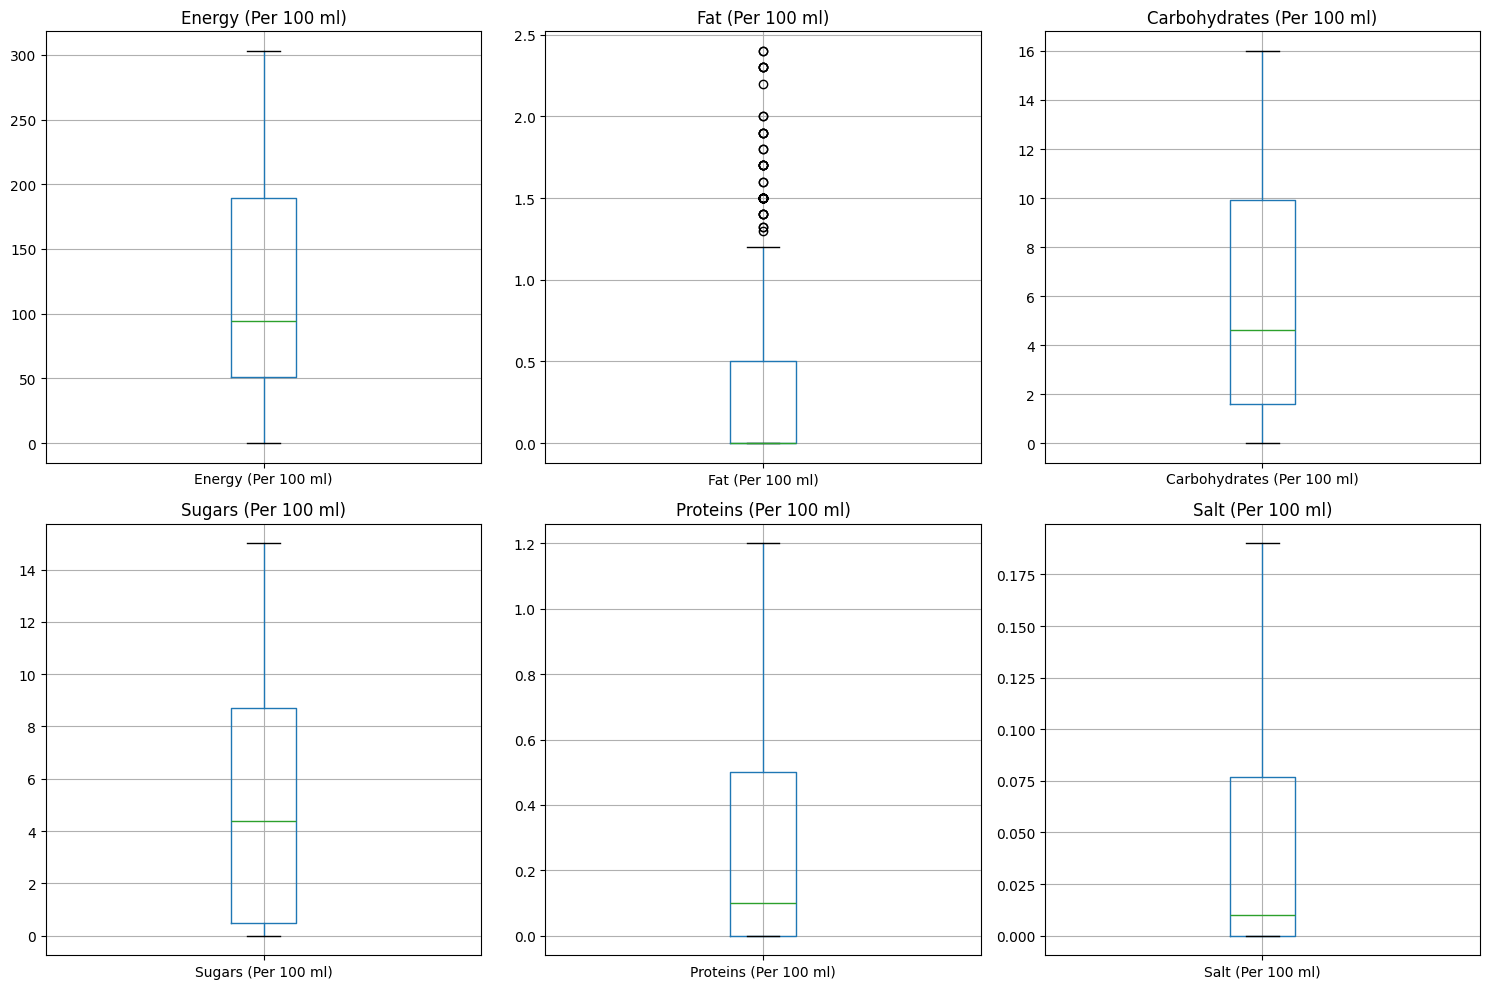

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, columns, multiplier=1.0):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns_to_check = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
                    'Sugars (Per 100 ml)', 'Proteins (Per 100 ml)', 'Salt (Per 100 ml)']

df1 = remove_outliers_iqr(df1, columns_to_check)

def plot_box(df_to_plot):
    columns_to_plot = df_to_plot.select_dtypes(include=['float64', 'int64']).columns.tolist()

    n_rows = (len(columns_to_plot) + 2) // 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        boxplot = df_to_plot.boxplot(column=[column], ax=ax)
        ax.set_title(column)

    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_box(df1[columns_to_check])

In [428]:
df1.isna().sum()

,0
Nutri_Score,0
Nama_minuman,0
Kategori,0
Energy (Per 100 ml),0
Carbohydrates (Per 100 ml),0
Sugars (Per 100 ml),0
Salt (Per 100 ml),0
Proteins (Per 100 ml),0
Fat (Per 100 ml),0


In [429]:
df1.describe()

,Nutri_Score,Energy (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Salt (Per 100 ml),Proteins (Per 100 ml),Fat (Per 100 ml)
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,1.281588,113.357401,5.583674,4.866589,0.038837,0.250637,0.315451
std,0.986411,80.541762,4.400756,4.069092,0.046813,0.298185,0.538672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,50.750000,1.600000,0.500000,0.000000,0.000000,0.000000
50%,1.000000,94.500000,4.600000,4.400000,0.010000,0.100000,0.000000
75%,2.000000,189.750000,9.900000,8.700000,0.077075,0.500000,0.500000
max,3.000000,303.000000,16.000000,15.000000,0.190000,1.200000,2.400000


Korelasi Fitur
---

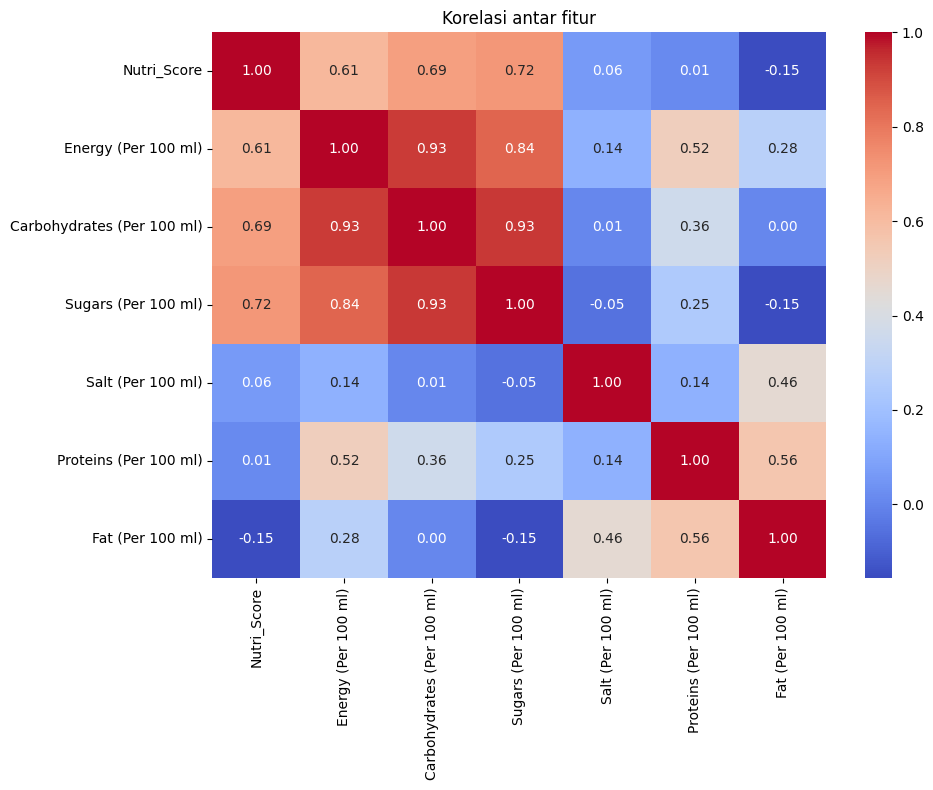

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df1[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur")
plt.tight_layout()
plt.show()

In [431]:
drop_cols = ['Sugars (Per 100 ml)', 'Fat (Per 100 ml)']
df1.drop(columns=drop_cols, inplace=True)

In [432]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 797
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nutri_Score                 554 non-null    int64  
 1   Nama_minuman                554 non-null    object 
 2   Kategori                    554 non-null    object 
 3   Energy (Per 100 ml)         554 non-null    float64
 4   Carbohydrates (Per 100 ml)  554 non-null    float64
 5   Salt (Per 100 ml)           554 non-null    float64
 6   Proteins (Per 100 ml)       554 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 34.6+ KB


Barplot
---

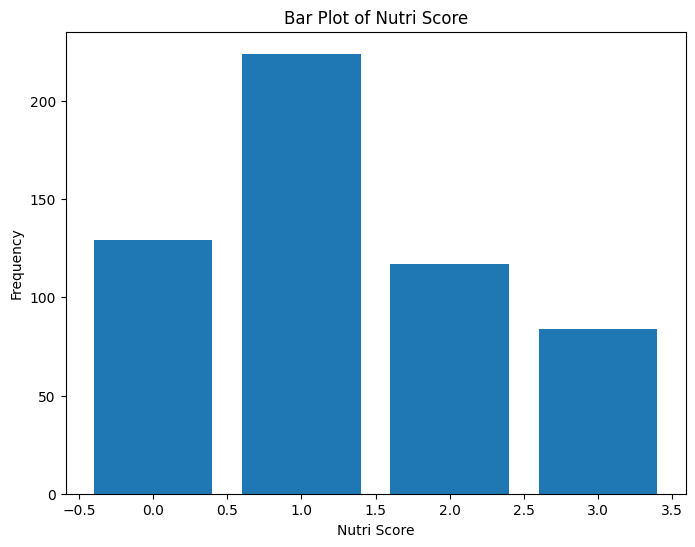

In [433]:
import matplotlib.pyplot as plt

label = df1['Nutri_Score']

value_counts = label.value_counts()
sorted_index = value_counts.index.sort_values()

plt.figure(figsize=(8, 6))
plt.bar(sorted_index, value_counts[sorted_index])
plt.xlabel('Nutri Score')
plt.ylabel('Frequency')
plt.title('Bar Plot of Nutri Score')
plt.show()

Scalling Data
---

In [434]:
from sklearn.preprocessing import MinMaxScaler

excluded_cols = ['Nutri_Score', 'Nama Minuman', 'Kategori']

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1[numeric_cols])

scaled_df = pd.DataFrame(scaled, columns=numeric_cols, index=df1.index)

df1 = pd.concat([df1.drop(columns=numeric_cols), scaled_df], axis=1)

In [435]:
df1.head()

,Nutri_Score,Nama_minuman,Kategori,Carbohydrates (Per 100 ml),Energy (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,3,Cappy pulpy,fruit-juices,0.56250,0.511551,0.000000,0.263158
1,1,PRESSup,fruit-juices,0.81250,0.745875,0.333333,0.000013
2,1,Press up,fruit-juices,0.81250,0.745875,0.333333,0.013158
3,1,Shot de gingembre bio,fruit-juices,0.49375,0.468647,0.416667,0.052632
4,2,Jutos,fruit-juices,0.62500,0.220462,0.000000,0.263158


Splitting Data
---

In [436]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Nutri_Score', 'Nama_minuman', 'Kategori'], axis=True)
y = df1['Nutri_Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [437]:
y_train.value_counts(normalize=True)

,proportion
Nutri_Score,
1,0.413437
0,0.227390
2,0.219638
3,0.139535


**Training Model**
---

Decision Tree
---
Nabhyla Niagara (5025221286)


In [438]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=9)
dtc_model.fit(x_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(x_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 76.05%


In [439]:
# max depth optimal
for i in [5,7,9,11,13,15,17,19,21]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(x_train, y_train)
    y_pred_check= check.predict(x_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 5 = 0.6766467065868264
Akurasi max depth 7 = 0.718562874251497
Akurasi max depth 9 = 0.7604790419161677
Akurasi max depth 11 = 0.7425149700598802
Akurasi max depth 13 = 0.7485029940119761
Akurasi max depth 15 = 0.7365269461077845
Akurasi max depth 17 = 0.7365269461077845
Akurasi max depth 19 = 0.7365269461077845
Akurasi max depth 21 = 0.7365269461077845


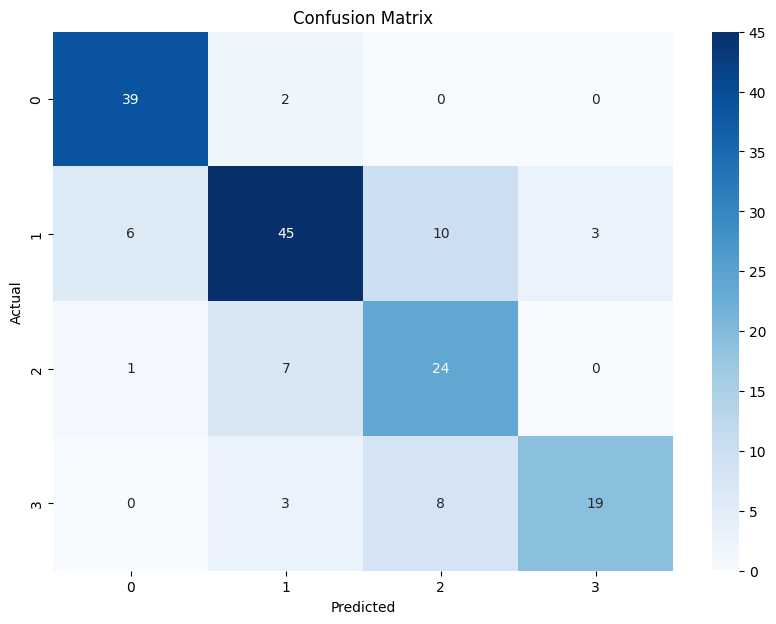

In [440]:
cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [441]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7604790419161677
Precision: 0.7680911765579957
Recall: 0.7594194613821138
F1-Score: 0.7549


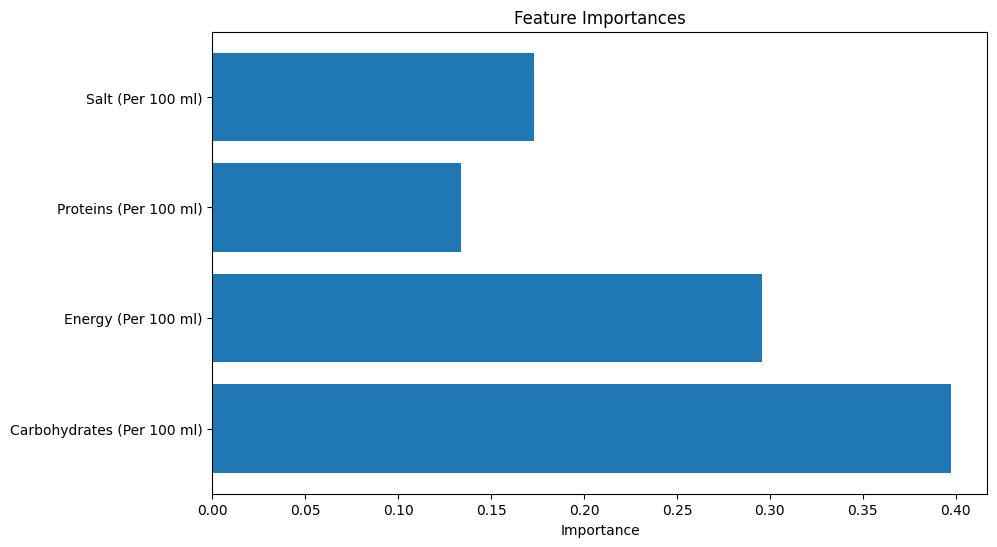

In [442]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Random Forest
---

In [447]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_model = RandomForestClassifier(criterion='gini', random_state=42, max_depth=11)
rf_model.fit(x_train, y_train)

# predict
y_pred_rf = rf_model.predict(x_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 79.03999999999999%


In [446]:
for i in [3,5,7,9,11,13,15]:
    check = RandomForestClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(x_train, y_train)
    y_pred_check= check.predict(x_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 3 = 0.6646706586826348
Akurasi max depth 5 = 0.7245508982035929
Akurasi max depth 7 = 0.7784431137724551
Akurasi max depth 9 = 0.7844311377245509
Akurasi max depth 11 = 0.7904191616766467
Akurasi max depth 13 = 0.7784431137724551
Akurasi max depth 15 = 0.7724550898203593


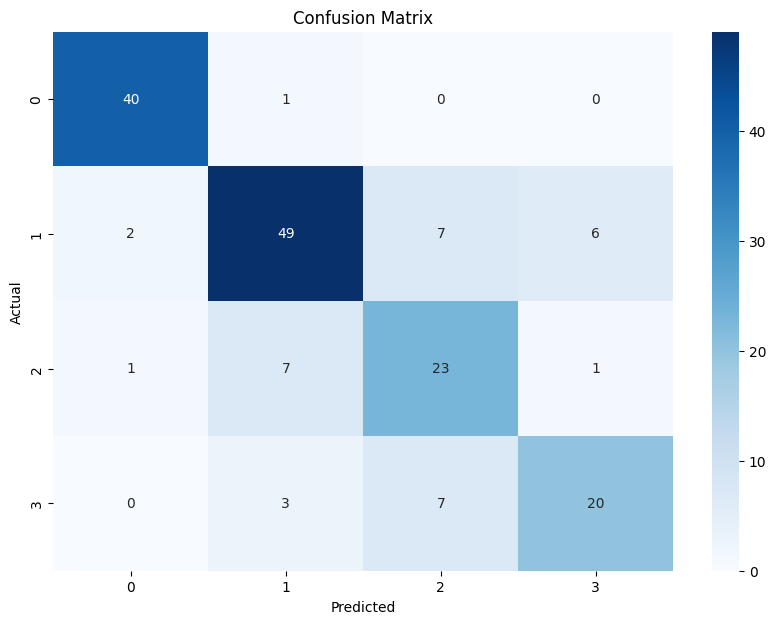

In [448]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [449]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7904191616766467
Precision: 0.7773153967921409
Recall: 0.7816628556910569
F1-Score: 0.7778


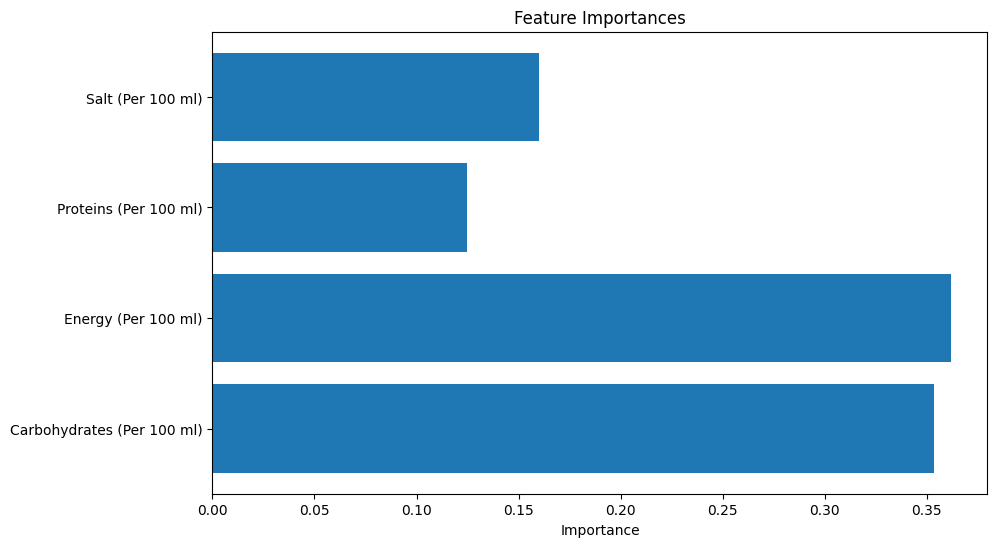

In [450]:
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()